In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

### We will use meta features for our xgboost.

In [2]:
train_data = pd.read_csv('train_data_features.csv')
test_data = pd.read_csv('test_data_features.csv')
cols2drop = ['Unnamed: 0', 'id', 'owner_id', 'text', 'likes', 'stop_word_count', 
                           'mean_word_length', 'char_count', 'hashtag_count', 'mention_count', 'text_cleaned', 'target', 'level_0']
y = train_data.target
X = train_data.drop(columns=cols2drop)
y_test = test_data.target
X_test = test_data.drop(columns=cols2drop)
X_test.head()

,word_count,unique_word_count,url_count,punctuation_count,0,1,2,3,4,5,...,758,759,760,761,762,763,764,765,766,767
0,19,17,1,16,-0.125409,0.255840,0.154449,0.482784,0.075200,0.203240,...,0.572304,-0.429751,-0.326690,0.307757,-0.454128,0.463744,-0.398144,0.010684,0.220520,0.067543
1,65,57,0,16,-0.174380,0.297185,0.275997,0.486414,0.167036,0.166272,...,0.606634,-0.391703,-0.324341,0.188155,-0.544689,0.385159,-0.453147,-0.003946,0.381305,0.111197
2,9,9,1,13,-0.282292,0.136174,0.224644,0.506266,0.318328,0.105079,...,0.279280,-0.353248,-0.429663,0.160669,-0.446561,0.471930,-0.376513,0.168899,0.189380,0.018906
3,9,9,1,13,-0.213819,0.226531,0.293704,0.495025,0.174804,0.198136,...,0.584661,-0.433841,-0.336273,0.232940,-0.504518,0.410615,-0.451595,0.003590,0.288760,0.107902
4,10,10,1,12,-0.122049,0.251590,0.187234,0.483840,0.082207,0.207534,...,0.572907,-0.442742,-0.314758,0.325131,-0.458581,0.467263,-0.418738,0.013893,0.187597,0.063382


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, 
                                                    stratify=y, shuffle=True, random_state=42)

In [4]:
params = {'n_estimators': 2048,
          'max_depth': 3,
          'learning_rate': 1e-2,
          'subsample': 0.96,
          'colsample_bytree': 0.80,
          'reg_lambda': 1,
          'reg_alpha': 1,
          'gamma': 1.4,
          'random_state': 16,
          'objective': 'binary:logistic',
          'tree_method': 'gpu_hist'}

model = XGBClassifier(**params)
model.fit(X_train, y_train,
eval_set=[(X_train, y_train), (X_val, y_val)], 
            early_stopping_rounds=20)
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

print('accuracy: {:.3f}, f1 score: {:.3f}, roc_auc: {:.3f}'.format(accuracy_score(y_val, y_pred), f1_score(y_val, y_pred), roc_auc_score(y_val, y_pred_proba)))

c:\Users\Alex\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68427	validation_1-logloss:0.68445
[1]	validation_0-logloss:0.67649	validation_1-logloss:0.67707
[2]	validation_0-logloss:0.66786	validation_1-logloss:0.66869
[3]	validation_0-logloss:0.65948	validation_1-logloss:0.66040
[4]	validation_0-logloss:0.65220	validation_1-logloss:0.65345
[5]	validation_0-logloss:0.64411	validation_1-logloss:0.64549
[6]	validation_0-logloss:0.63611	validation_1-logloss:0.63771
[7]	validation_0-logloss:0.62822	validation_1-logloss:0.63005
[8]	validation_0-logloss:0.62140	validation_1-logloss:0.62361
[9]	validation_0-logloss:0.61389	validation_1-logloss:0.61625
[10]	validation_0-logloss:0.60643	validation_1-logloss:0.60900
[11]	validation_0-logloss:0.59913	validation_1-logloss:0.60188
[12]	validation_0-logloss:0.59201	validation_1-logloss:0.59486
[13]	validation_0-logloss:0.58503	validation_1-logloss:0.58796
[14]	validation_0-logloss:0.57811	validation_1-logloss:0.58120
[15]	validation_0-logloss:0.57137	validation_1-logloss:0.57458
[1

In [5]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
print('accuracy: {:.3f}, f1_score: {:.3f}, roc_auc_score: {:.3f}'.format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_proba)))

accuracy: 0.961, f1_score: 0.961, roc_auc_score: 0.994


### Nice improvement! from accuracy: 0.899, f1_score: 0.897, roc_auc_score: 0.916

### But, metafeature only in top 25. However, we have improved performance and saved computing power.

<AxesSubplot: ylabel='names'>

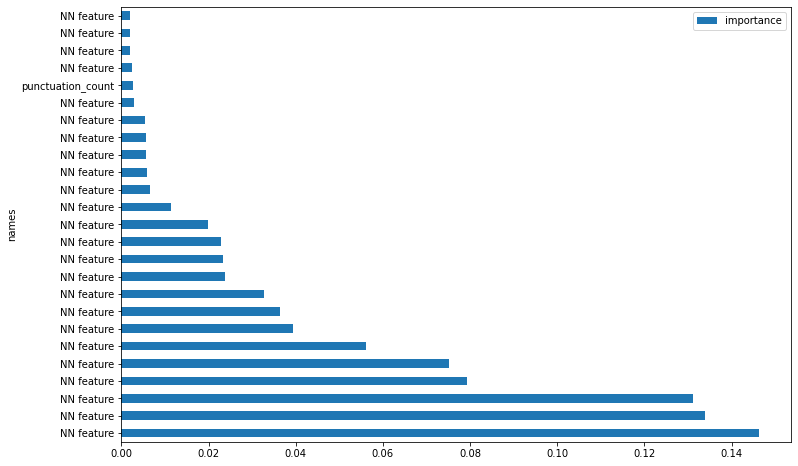

In [13]:
df = pd.DataFrame({'importance': model.feature_importances_,
                    'names': model.feature_names_in_})

import re
pat = re.compile(r'[0-9]')
df['names'] = df.names.apply(lambda x: 'NN feature' if re.findall(pat, x) else x )
df = df.sort_values(by='importance', key=lambda x: -x)

fig, ax = plt.subplots(figsize=(12, 8))
df[:25].plot.barh(y='importance', x='names', ax=ax)